# <u>Projeto de Regressão Linear - House Prices<u>

- Neste projeto, será utilizado um conjunto de dados de preços de casas fictício, onde cada instância representará uma casa e cada atributo suas características.
- O objetivo é realizar todo o processo de data science e por fim desenvolver um modelo de Regressão Linear que possa prever valores das casas com base em suas informações.

# <u>Etapas:</u>
1. Entendimento dos Dados;
2. Tratamento dos Dados;
3. Análise Exploratória de Dados e Análise de Componentes Principais;
4. Modelagem do Algorítmo de Regressão Linear;
5. Divisão dos dados em Treino e Teste e Treinamento do Modelo;
6. Encontrando o melhor modelo com GridSearchCV;
7. Sumários, métricas e conclusões.

## <u>Dicionário de Dados</u>

- <b>Avg. Area Income:</b> Renda média dos residentes da área onde a casa está localizada.
- <b>Avg. Area House Age:</b> Idade média das casas na área.
- <b>Avg. Area Number of Rooms</b> Número médio de quartos por casa na área.
- <b>Avg. Area Number of Bedrooms:</b> Número médio de quartos por casa na área.
- <b>Area Population:</b> População da área onde a casa está localizada.
- <b>Price:</b> Preço da casa.
- <b>Address:</b> Endereço da casa.

# 1. Entendimento dos Dados

## Regressão Linear Teoria Básica

Teoria: Dados tendem a regredir a média, em um estudo feito em pais e filhos em relação a sua altura, pais altos tendem a ter filhos altos porém seus filhos tendem também a serem menores que os pais e com alturas mais próximas a média de altura das pessoas, esta tendência a regredir e se aproximar é chamada de regressão.
O objetivo de uma regressão linear é minimizar a distância vertical entre todos os datapoints em relação a linha.
Existem várias formas de minimizar esta distância (soma dos erros quadráticos, soma dos erros absolutos etc), todos estes métodos tem como objetivo minimizar esta distância.
Um dos métodos mais populares é o <b>método dos mínimos quadrados - Least Squares Method</b>, é ajustado minimizando a soma quadrática dos residuos. O residuo de uma observação é a diferença entre onde esta observação/datapoint está e onde a linha foi traçada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Configurando objetos Pandas DataFrame e Numpy Arrays para exibirem todas as informações
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurando estilo e paleta de cores que serão utilizadas nos gráficos
sns.set_theme(style="white", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [2]:
# Reading USA House dataset and viewing the first lines
df = pd.read_csv('USA_Housing.csv')
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [3]:
# Checking Data Types - Number of rows and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Verificando Dados Nulos

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

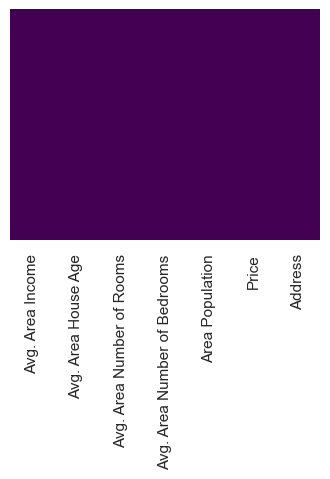

In [4]:
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df.isnull().sum()

## Verificando Dados Infinitos

In [5]:
np.isinf(df.select_dtypes(include=['number'])).sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

## Verificando Dados Duplicados

In [6]:
df.duplicated().sum()

0

## Estatísticas Descritivas

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# 2. Tratamento dos Dados
- Observando a variável 'Address' existem diversas informações em cada string, serão utilizados padrões de expressões regulares para dividir cada informação em uma variável separada, podem existir informações relevantes para o entendimento dos dados e para a execução do modelo.

In [8]:
df.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."


In [9]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [10]:
df['Address'][4]

'USNS Raymond\nFPO AE 09386'

## Primeiro Padrão Regex

In [11]:
# Nova regex para extrair informações do endereço
regex = r'^(\d+)\s+([^,\n]+)\s+(.*?)\s*\n([^,]+),\s*([A-Z]{2})\s+(\d{5}(?:-\d{4})?)'

# Aplicando a regex para criar novas colunas
df[['Numero', 'Rua', 'Complemento', 'Cidade', 'Estado', 'CEP']] = df['Address'].str.extract(regex)

df.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Numero,Rua,Complemento,Cidade,Estado,CEP
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208,Michael Ferry Apt.,674,Laurabury,NE,37010-5101


Avg. Area Income                0.0000
Avg. Area House Age             0.0000
Avg. Area Number of Rooms       0.0000
Avg. Area Number of Bedrooms    0.0000
Area Population                 0.0000
Price                           0.0000
Address                         0.0000
Numero                          0.1028
Rua                             0.1028
Complemento                     0.1028
Cidade                          0.1028
Estado                          0.1028
CEP                             0.1028
dtype: float64

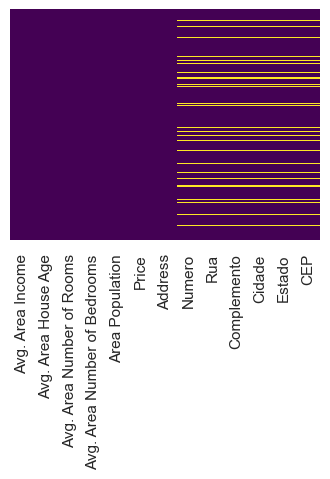

In [12]:
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
(df.isnull().sum() / len(df))

## Cerca de 10,28% dos dados não foram capturados no padrão regex anterior
- Será aplicado um novo padrão regex para esses dados restantes para extrair o restante das informações corretamente.

In [13]:
df['Address'][4]

'USNS Raymond\nFPO AE 09386'

In [14]:
# Supondo que seu DataFrame se chame df
quebras_de_linha = df['Address'].str.count('\n').sum()
print("Número total de quebras de linha na coluna 'Address':", quebras_de_linha)

Número total de quebras de linha na coluna 'Address': 5000


In [15]:
# Supondo que seu DataFrame se chame df

patterns = ['FPO','DPO','APO']
for pattern in patterns:    
    number_patterns = df['Address'].str.count(pattern).sum()
    print(f"Número total do padrão '{pattern}': {number_patterns}")

Número total do padrão 'FPO': 185
Número total do padrão 'DPO': 162
Número total do padrão 'APO': 167


In [16]:
# Filtrando os dados restantes que não foram extraídos
df_resto = df[df['Numero'].isnull()]

# Dividir a coluna "Address" pelo padrão '\n' e pegar a primeira parte (antes do '\n')
df_resto['Complemento'] = df['Address'].str.split('\n').str[0]

# Definir o padrão regex com grupos de captura para extrair cidade, estado e CEP
pattern = r'\n([A-Z]{3})\s([A-Z]{2})\s(\d{5}-\d{4}|\d{5})'  # Padrão para estado com 2 letras e CEP

# Aplicar a regex e extrair as informações para as colunas "Cidade", "Estado" e "CEP"
df_resto[['Cidade', 'Estado', 'CEP']] = df['Address'].str.extract(pattern)

display(df_resto.sample(3))

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Numero,Rua,Complemento,Cidade,Estado,CEP
3103,60658.648333,4.537630,6.440243,3.49,45004.970015,822685.374582,USNS Ramirez\nFPO AP 39441-7948,NaN,NaN,USNS Ramirez,FPO,AP,39441-7948
3757,45862.131380,5.453673,5.128001,2.40,40339.035349,576356.031882,USNS Wallace\nFPO AP 94167-1961,NaN,NaN,USNS Wallace,FPO,AP,94167-1961
2476,54051.024664,5.365761,7.654447,3.21,27822.496373,914378.334428,"PSC 6223, Box 3745\nAPO AA 82126",NaN,NaN,"PSC 6223, Box 3745",APO,AA,82126


In [17]:
# Substituir os valores nulos no DataFrame original pelos valores tratados do df_resto
df.loc[df['Numero'].isnull(), ['Numero', 'Rua', 'Complemento',
                               'Cidade', 'Estado', 'CEP']] = df_resto[['Numero', 'Rua', 'Complemento',
                                                                       'Cidade', 'Estado', 'CEP']]

In [18]:
# Verificando as Mudanças
(df.isnull().sum() / len(df))

Avg. Area Income                0.0000
Avg. Area House Age             0.0000
Avg. Area Number of Rooms       0.0000
Avg. Area Number of Bedrooms    0.0000
Area Population                 0.0000
Price                           0.0000
Address                         0.0000
Numero                          0.1028
Rua                             0.1028
Complemento                     0.0000
Cidade                          0.0000
Estado                          0.0000
CEP                             0.0000
dtype: float64

## <u>Conclusões:</u>
- Primeiramente verifiquei alguns padrões nas strings dos endereços que não foram assimiladas pelo padrão regex anterior, percebi padrões de quebra de linha e siglas após a quebra de linha que julguei ser siglas de cidades pois logo após temos o estado e cep.

- Foi realizado um processo em que os dados nulos foram tratados separadamente para mantermos o df original intacto. Neste processo foi possível eliminar todos os dados nulos dos complementos dos endereços, cidades, estado e cep, porém algumas informações não pude distinguir o que era rua ou número portanto mantive todas no 'Complemento'.

- Por fim estas novas informações foram inseridas no dataframe original.

## <u>Verificação de Outliers</u>
- <b>Primeira Verificação (Z-score):</b> O Z-score é uma medida estatística que indica o quão longe um dado está da média em termos de desvios padrão. Valores de Z-score muito altos (geralmente acima de 2 ou 3 desvios padrão) podem indicar a presença de outliers.
- <b>Segunda Verificação (IQR):</b> O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Os valores que estão muito abaixo de Q1 - 1,5 * IQR ou muito acima de Q3 + 1,5 * IQR são considerados outliers pelo método IQR.
- <b> Terceira Verificação (Boxplot):</b> Serão feitos gráficos de boxplot em que os outliers serão representados como pontos fora dos limites de cada caixa;

In [19]:
# Z-score
from scipy.stats import zscore

# Calcular o Z-score para todas as variáveis numéricas
df_zscore = df.select_dtypes(include=['number']).apply(zscore)

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)].any(axis=1)
print(f'Número de outliers identificados pelo Z-score: {outliers_zscore.sum()}\n')

# Identificar outliers usando o Z-score (valores com Z-score > 3 ou < -3 são considerados outliers)
outliers_zscore = df_zscore[(df_zscore > 3) | (df_zscore < -3)]

# Visualizar os outliers por coluna
outliers_by_column = outliers_zscore.stack().reset_index()
outliers_by_column.columns = ['Index', 'Column', 'Z-score']
print("Outliers identificados por coluna:")

# Exibindo apenas 5 pois foram muitos resultados
print(outliers_by_column.head())

# Visualizar os outliers por instância
outliers_by_instance = outliers_zscore.any(axis=1)
outliers_indices = outliers_by_instance[outliers_by_instance].index
print("\nÍndices das instâncias com outliers:")
print(outliers_indices)

Número de outliers identificados pelo Z-score: 57

Outliers identificados por coluna:
   Index            Column   Z-score
0     39  Avg. Area Income -4.765584
1    228   Area Population  3.366558
2    256             Price  3.019995
3    263             Price -3.058779
4    314   Area Population -3.626413

Índices das instâncias com outliers:
Index([  39,  228,  256,  263,  314,  353,  411,  465,  496,  693,  924,  962,
       1074, 1091, 1234, 1248, 1271, 1459, 1530, 1536, 1595, 1628, 1661, 1734,
       1757, 1777, 1799, 1891, 2066, 2092, 2173, 2465, 2534, 2538, 2719, 2756,
       2771, 2829, 2839, 2898, 3069, 3134, 3138, 3212, 3336, 3541, 3806, 3855,
       3989, 3991, 4087, 4488, 4491, 4565, 4716, 4803, 4855],
      dtype='int64')


In [20]:
# Filtrar o DataFrame original para incluir apenas colunas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular o IQR (Intervalo Interquartil) para cada variável numérica
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers em cada coluna numérica usando o método IQR
outliers_indices = []
outliers_columns = []

for col in df_numeric.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        outliers_indices.extend(outliers.index)
        outliers_columns.extend([col] * len(outliers))

# Criar um DataFrame com os índices das instâncias com outliers e as colunas correspondentes
outliers_df = pd.DataFrame({'Index': outliers_indices, 'Outlier_Column': outliers_columns})

# Mostrar o número de outliers identificados e a tabela com os índices das instâncias e colunas com outliers
print("Número de outliers identificados pelo método IQR:", len(outliers_df))
print("\nÍndices das instâncias com outliers e colunas correspondentes:")
print(outliers_df.sample(4))

Número de outliers identificados pelo método IQR: 146

Índices das instâncias com outliers e colunas correspondentes:
    Index       Outlier_Column
31   4855     Avg. Area Income
99   3120      Area Population
83    353      Area Population
51   4324  Avg. Area House Age


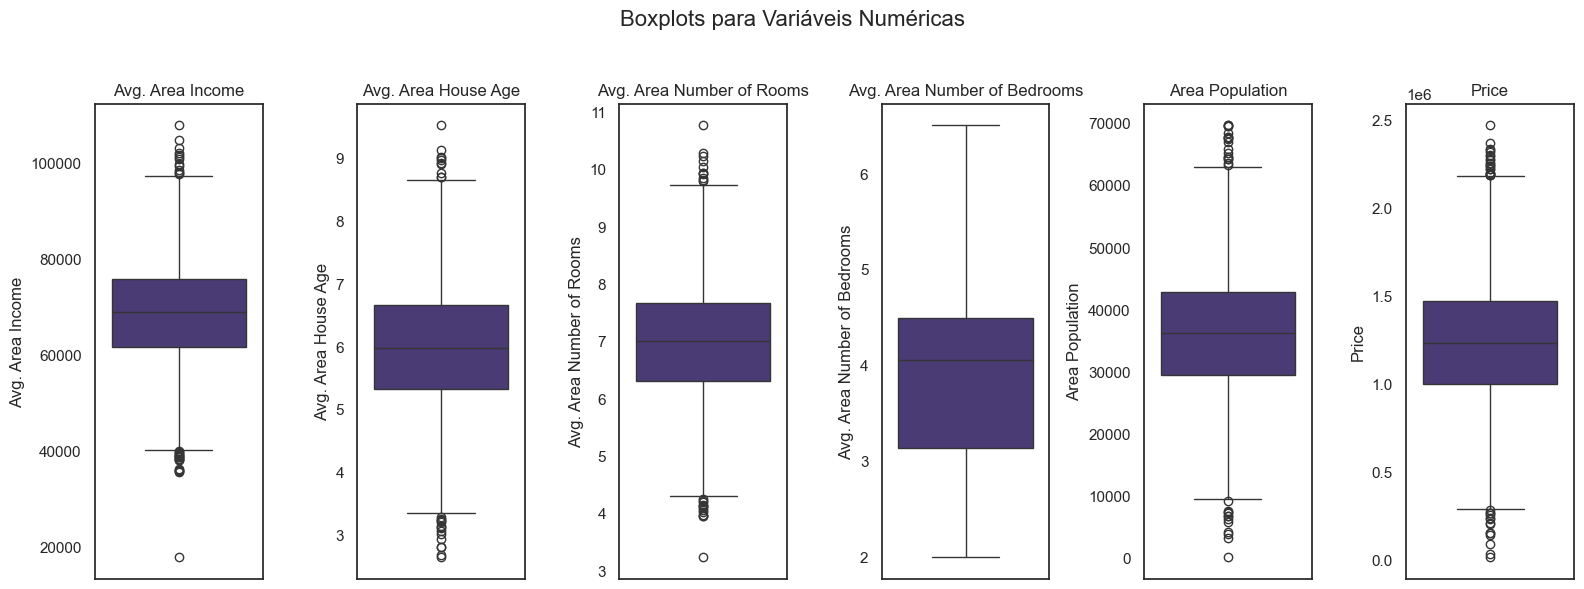

In [21]:
# Filtrando apenas a lista das variáveis numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Configuração dos subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 6))
fig.suptitle('Boxplots para Variáveis Numéricas', fontsize=16)

# Criar boxplots para cada variável numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta a disposição para não sobrepor o título principal
plt.show()

# 3. Análise Exploratória de Dados
- Nesta etapa serão respondidas perguntas de negócio elaboradas com base nas variáveis disponíveis.
- Também serão criados gráficos para melhor visualizarmos e entendermos o dataset.

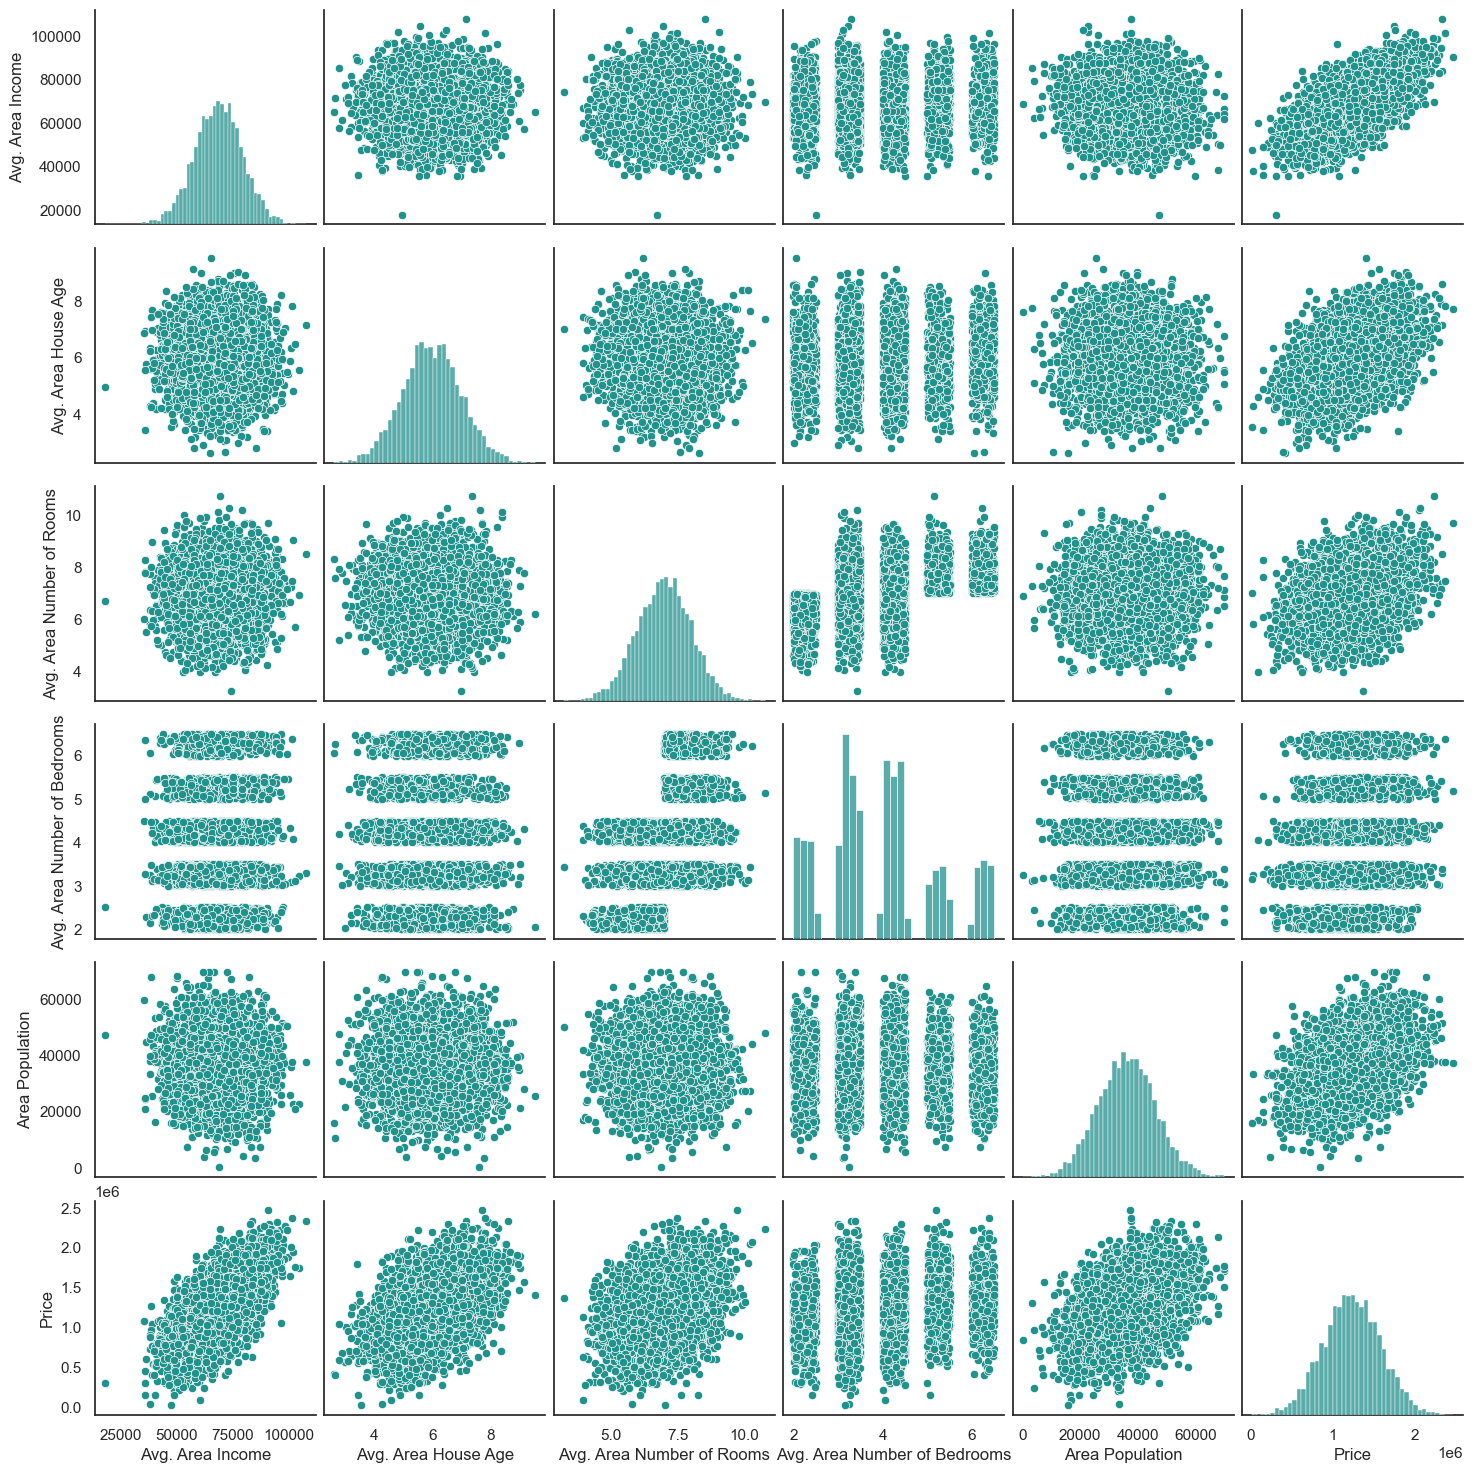

In [22]:
sns.pairplot(df, plot_kws={'color': '#21918c'}, diag_kws={'color': '#21918c'}) # cor da diagonal histogramas e cor dos scatterplots

- For the Average área number of bedrooms we can see some noise on the scatterplot because you can't usually have 2.5 bedrooms.

## Correlações entre as Variáveis
- Esta função recebe um conjunto de dados que possua variáveis numéricas e retornará uma lista das 10 maiores correlações positivas e negativas.

Maiores Correlações:
1: Price - Avg. Area Income: 0.6397337782498983
2: Avg. Area Number of Bedrooms - Avg. Area Number of Rooms: 0.46269485961748213
3: Avg. Area House Age - Price: 0.4525425371787552
4: Price - Area Population: 0.40855587931655574
5: Price - Avg. Area Number of Rooms: 0.3356644533667598
6: Price - Avg. Area Number of Bedrooms: 0.17107102765855647
7: Avg. Area Income - Avg. Area Number of Bedrooms: 0.019788221120947695
8: Avg. Area Number of Bedrooms - Avg. Area House Age: 0.006148923348343049
9: Avg. Area Number of Rooms - Area Population: 0.0020399280331313734
10: Avg. Area Income - Avg. Area House Age: -0.002006826428996918

Menores Correlações:
1: Avg. Area Number of Bedrooms - Area Population: -0.0221676418702468
2: Area Population - Avg. Area House Age: -0.018742761942119622
3: Area Population - Avg. Area Income: -0.016233739927565122
4: Avg. Area Income - Avg. Area Number of Rooms: -0.011031660286870896
5: Avg. Area Number of Rooms - Avg. Area House Age: -0.0094

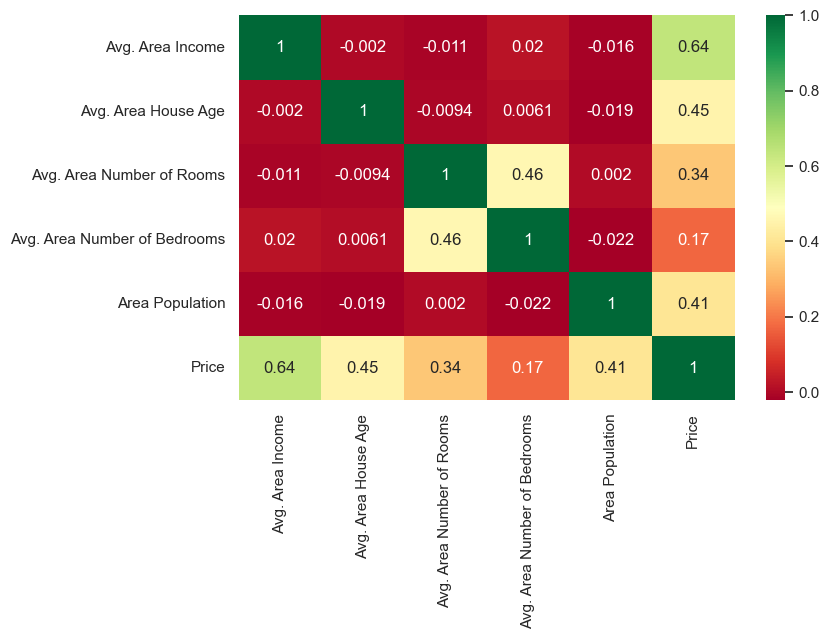

In [23]:
def print_top_correlations(df):
    correlation_matrix = df.corr(numeric_only=True)

    plt.figure(figsize=(8,5))
    sns.heatmap(data=correlation_matrix,
                annot=True,
                cmap='RdYlGn')

    top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

    # Pegue as 10 maiores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].head(10)
    count = 0
    print('Maiores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

    # Pegue as 10 menores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].tail(10)
    top_10_correlations.sort_values(ascending=True,inplace=True)
    count = 0
    print(f'\nMenores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

print_top_correlations(df)

### Maiores Correlações:
- <b>Price - Avg. Area Income (0.639):</b>
Há uma forte correlação positiva entre a renda média da área e o preço das casas. Isso sugere que áreas com renda média mais alta tendem a ter preços de imóveis mais elevados.

- <b>Avg. Area Number of Bedrooms - Avg. Area Number of Rooms (0.462):</b>
Existe uma correlação moderada positiva entre o número médio de quartos e o número médio de cômodos. Isso indica que casas com mais quartos geralmente têm mais cômodos.

- <b>Avg. Area House Age - Price (0.452):</b>
Há uma correlação moderada positiva entre a idade média das casas e o preço. Isso pode significar que casas mais novas tendem a ter preços mais altos.

- <b>Price - Area Population (0.408):</b>
Existe uma correlação moderada positiva entre a população da área e o preço das casas. Isso pode indicar que áreas mais populosas tendem a ter preços de imóveis mais elevados.

- <b>Price - Avg. Area Number of Rooms (0.335):</b>
Há uma correlação moderada positiva entre o número médio de cômodos e o preço das casas. Isso sugere que casas com mais cômodos geralmente têm preços mais altos.

### Menores Correlações:

- <b>Avg. Area Number of Bedrooms - Area Population (-0.022):</b>
Existe uma correlação negativa muito fraca entre o número médio de quartos e a população da área. Isso pode não ter um impacto significativo nos preços das casas.

- <b>Area Population - Avg. Area House Age (-0.018):</b>
Há uma correlação negativa muito fraca entre a população da área e a idade média das casas. Essa relação também pode não ser significativa para os preços das casas.

- <b>Area Population - Avg. Area Income (-0.016):</b>
Existe uma correlação negativa muito fraca entre a população da área e a renda média da área. Essa relação pode não ser um fator determinante nos preços das casas.


# Preços com a maior frequência (Distribuição dos Preços)

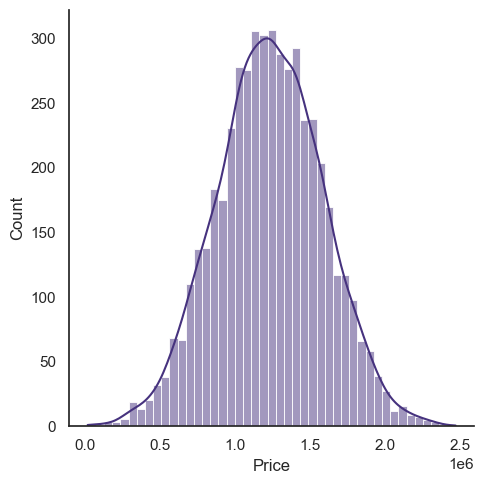

In [24]:
# Checking the distribution of the price to see what prices are most commonly seen
sns.displot(df['Price'], kde=True, line_kws={'color': '#3e4989'})

### Conclusões: 
- É possível observar uma distribuição normal em que vemos poucas casas sendo vendidas nos intervalos do primeiro e terceiro quartis, e a maioria das casas neste conjunto de dados está na faixa de preço mediana, situada em algum lugar entre 1 e 1,5 milhão de dólares.

# Pergunta de Negócio: Como as características das casas variam entre diferentes faixas de preço?
- Serão classificadas casas de luxo e acessíveis com base em seus quartis de preço;
- Após a classificação serão realizadas análises descritivas e de correlação para casa tipo de casa classificada.
- Por fim será modelado um algorítmo de análise de componentes principais para entendermos quais variáveis ou características das casas têm influência significativa nos principais componentes que capturam a variação dos dados. No contexto da análise das casas de luxo e acessíveis, o PCA nos ajuda a identificar quais características contribuem mais para a distinção entre essas duas categorias de casas.

In [25]:
# Definição das faixas de preço
df['home_class'] = 'Affordable'
df.loc[df['Price'] > df['Price'].quantile(0.75), 'home_class'] = 'Luxury'  # Casas de luxo (acima do 75º percentil)
df.loc[df['Price'] <= df['Price'].quantile(0.25), 'home_class'] = 'Affordable'  # Casas mais acessíveis (até o 25º percentil)

In [26]:
df['Price'].quantile(0.75)

1471210.2042115545

In [27]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Numero,Rua,Complemento,Cidade,Estado,CEP,home_class
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208,Michael Ferry Apt.,674,Laurabury,NE,37010-5101,Affordable
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",188,Johnson Views Suite,079,Lake Kathleen,CA,48958,Luxury
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",9127,Elizabeth,Stravenue,Danieltown,WI,06482-3489,Affordable
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,NaN,NaN,USS Barnett,FPO,AP,44820,Affordable
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,NaN,NaN,USNS Raymond,FPO,AE,09386,Affordable


## Estatísticas descritivas para casas de luxo e acessíveis

Estatísticas descritivas para casas de alto padrão:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03
mean,77299.248601,6.536402,7.412198,4.254184,41368.809484,1.680889e+06
std,8877.413833,0.898830,0.978313,1.236101,9445.638113,1.717182e+05
min,48855.851354,3.410786,4.384629,2.000000,7360.295191,1.471747e+06
25%,71346.079966,5.967650,6.762334,3.232500,34970.806673,1.546073e+06
50%,77051.657960,6.538027,7.432915,4.180000,41473.317773,1.637836e+06
75%,83106.176579,7.107854,8.071077,5.250000,47302.714698,1.779871e+06
max,107701.748378,9.125283,10.759588,6.500000,69621.713378,2.469066e+06




Estatísticas descritivas para casas de baixo padrão:


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3.750000e+03
mean,65677.729112,5.790829,6.846323,3.890379,34428.418223,1.082467e+06
std,9562.307372,0.950038,0.974724,1.220159,9465.578115,2.586353e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,59469.390111,5.173304,6.174720,3.110000,27892.133222,9.200970e+05
50%,65978.840614,5.767648,6.868027,4.010000,34602.004623,1.116817e+06
75%,72317.069839,6.430973,7.508999,4.430000,40817.149627,1.285285e+06
max,96397.582684,9.519088,10.024375,6.500000,67727.229051,1.471031e+06


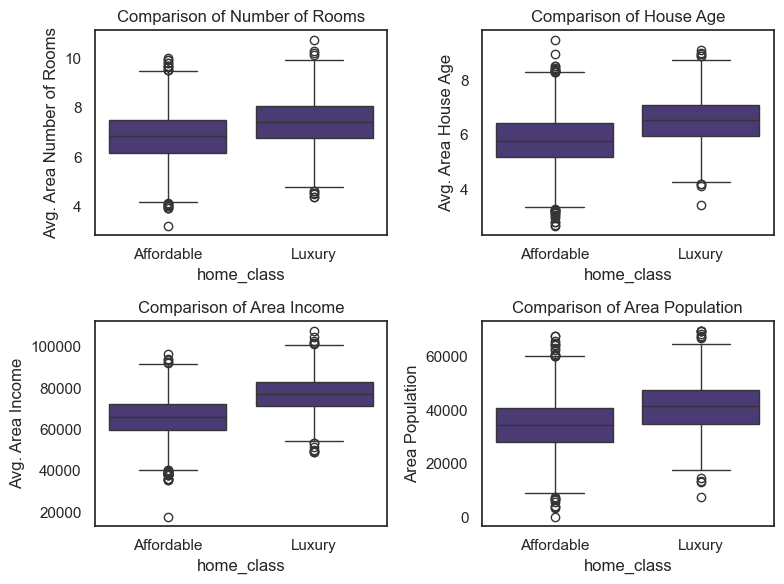

In [28]:
# Dividir o DataFrame em casas de luxo e casas acessíveis
luxury_df = df[df['home_class'] == 'Luxury'].select_dtypes(include=['float64', 'int64'])
affordable_df = df[df['home_class'] == 'Affordable'].select_dtypes(include=['float64', 'int64'])

print(f'Estatísticas descritivas para casas de alto padrão:')
display(luxury_df.describe())
print(f'\n\nEstatísticas descritivas para casas de baixo padrão:')
display(affordable_df.describe())

# Criação dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(data=df, x='home_class', y='Avg. Area Number of Rooms', ax=axes[0, 0])
axes[0, 0].set_title('Comparison of Number of Rooms')

sns.boxplot(data=df, x='home_class', y='Avg. Area House Age', ax=axes[0, 1])
axes[0, 1].set_title('Comparison of House Age')

sns.boxplot(data=df, x='home_class', y='Avg. Area Income', ax=axes[1, 0])
axes[1, 0].set_title('Comparison of Area Income')

sns.boxplot(data=df, x='home_class', y='Area Population', ax=axes[1, 1])
axes[1, 1].set_title('Comparison of Area Population')

plt.tight_layout()
plt.show()

### Conclusões Estatísticas Descritivas
<b>Casas de Luxo:</b>

- Média de Renda Média da Área (Avg. Area Income): Cerca de 77,299 USD.
- Média de Idade Média das Casas (Avg. Area House Age): Aproximadamente 6.54 anos.
- Média de Número Médio de Quartos (Avg. Area Number of Rooms): Em torno de 7.41 quartos.
- Média de Número Médio de Quartos (Avg. Area Number of Bedrooms): Cerca de 4.25 quartos.
- Média de População da Área (Area Population): Por volta de 41,368 habitantes.
- Média de Preço (Price): Em torno de 1,680,889.

<b>Casas Acessíveis:</b>

- Média de Renda Média da Área (Avg. Area Income): Aproximadamente 65,678 USD.
- Média de Idade Média das Casas (Avg. Area House Age): Cerca de 5.79 anos.
- Média de Número Médio de Quartos (Avg. Area Number of Rooms): Em torno de 6.85 quartos.
- Média de Número Médio de Quartos (Avg. Area Number of Bedrooms): Cerca de 3.89 quartos.
- Média de População da Área (Area Population): Por volta de 34,428 habitantes.
- Média de Preço (Price): Aproximadamente 1,082,467 USD.


### <u>Conclusões<u>
- Renda Média da Área e Preço: As casas de luxo têm uma média de renda média da área e preço consideravelmente mais alta do que as casas acessíveis. Isso sugere que essas variáveis são indicadores importantes na determinação da classe de luxo.
Número de Quartos e Quartos: As casas de luxo tendem a ter mais quartos e quartos do que as casas acessíveis, o que é consistente com o conceito de luxo e espaços maiores.
- Idade das Casas: As casas de luxo têm uma média de idade ligeiramente maior em comparação com as casas acessíveis, o que pode refletir em propriedades mais estabelecidas e personalizadas.
- População da Área: A população da área é menor em casas de luxo, sugerindo um ambiente mais exclusivo e privado em comparação com áreas mais densamente povoadas onde as casas acessíveis estão localizadas.
Essas conclusões destacam as diferenças significativas entre as características das casas de luxo e acessíveis, refletindo nas distintas faixas de preço e padrões de vida associados a cada categoria.

## Análise de Correlação para casas de luxo e acessíveis

In [29]:
# Calcular a correlação para casas de luxo
luxury_corr = luxury_df.corr()
print("Correlação para casas de luxo:")
print(luxury_corr['Price'].sort_values(ascending=False))

# Calcular a correlação para casas acessíveis
affordable_corr = affordable_df.corr()
print("\nCorrelação para casas acessíveis:")
print(affordable_corr['Price'].sort_values(ascending=False))

Correlação para casas de luxo:
Price                           1.000000
Avg. Area Income                0.394600
Avg. Area House Age             0.218772
Area Population                 0.217597
Avg. Area Number of Rooms       0.176412
Avg. Area Number of Bedrooms    0.049062
Name: Price, dtype: float64

Correlação para casas acessíveis:
Price                           1.000000
Avg. Area Income                0.513882
Avg. Area House Age             0.359932
Area Population                 0.307672
Avg. Area Number of Rooms       0.255524
Avg. Area Number of Bedrooms    0.131499
Name: Price, dtype: float64


### Correlação para Casas de Luxo:

- Avg. Area Income (Renda Média da Área): Correlação positiva moderada de aproximadamente 0.395. Isso sugere que, em geral, áreas com renda média mais alta estão associadas a preços mais elevados para as casas de luxo.
- Avg. Area House Age (Idade Média das Casas): Correlação positiva mais fraca de cerca de 0.219. Indica que casas mais antigas podem ter preços um pouco mais altos, mas essa relação não é tão forte quanto a renda média da área.
- Area Population (População da Área): Correlação positiva modesta de cerca de 0.218. Isso sugere que áreas mais populosas podem ter impacto nos preços das casas de luxo, possivelmente devido à demanda por localizações mais movimentadas.
- Avg. Area Number of Rooms (Número Médio de Quartos): Correlação positiva relativamente baixa de aproximadamente 0.176. Indica que um maior número de quartos pode influenciar ligeiramente os preços das casas de luxo.
- Avg. Area Number of Bedrooms (Número Médio de Quartos): Correlação positiva muito fraca de cerca de 0.049. Isso sugere que o número de quartos pode ter uma influência mínima nos preços das casas de luxo.

### Correlação para Casas Acessíveis:

- Avg. Area Income (Renda Média da Área): Correlação positiva mais forte de cerca de 0.514. Isso indica uma relação mais direta entre a renda média da área e os preços das casas acessíveis, onde áreas com renda mais alta tendem a ter casas com preços mais altos.
- Avg. Area House Age (Idade Média das Casas): Correlação positiva significativa de aproximadamente 0.360. Indica que, para as casas acessíveis, a idade das casas também desempenha um papel importante nos preços, com casas mais antigas tendo preços um pouco mais altos.
- Area Population (População da Área): Correlação positiva considerável de cerca de 0.308. Isso sugere que áreas mais populosas têm influência nos preços das casas acessíveis, possivelmente devido à demanda por áreas mais movimentadas.
- Avg. Area Number of Rooms (Número Médio de Quartos): Correlação positiva moderada de aproximadamente 0.256. Indica que um maior número de quartos pode ter um impacto mais significativo nos preços das casas acessíveis em comparação com as casas de luxo.
- Avg. Area Number of Bedrooms (Número Médio de Quartos): Correlação positiva fraca de cerca de 0.131. Isso sugere que o número de quartos tem uma influência menor nos preços das casas acessíveis em comparação com as casas de luxo.

## Análise de Componentes Principais (PCA) para casas de luxo e acessíveis
A Análise de Componentes Principais (PCA) pode ser aplicada para reduzir a dimensionalidade dos dados, ao mesmo tempo em que preserva a maior parte da variação nas características das casas. Isso pode ajudar a visualizar se há uma distinção clara nas características das casas entre os segmentos de luxo e acessíveis.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
# Padronizar os dados
scaler = StandardScaler()
luxury_scaled = scaler.fit_transform(luxury_df)
affordable_scaled = scaler.transform(affordable_df)

In [32]:
display(luxury_scaled[0:2])
affordable_scaled[0:2]

array([[ 0.21967818, -0.59378916, -0.69676083, -0.94219662, -0.12664215,
        -1.01950963],
       [-1.41998883, -0.56881774,  0.75216786, -0.68321443,  2.06097543,
        -1.04185225]])

array([[ 0.25312653, -0.94999268, -0.41210903, -0.13287728, -1.93627217,
        -3.6228229 ],
       [-1.8044208 , -0.74628155,  1.12537556,  0.70881482, -0.47518715,
        -3.62308838]])

In [33]:
# Aplicar PCA
pca = PCA(n_components=2)
luxury_pca = pca.fit_transform(luxury_scaled)
affordable_pca = pca.transform(affordable_scaled) # verificar por que um é fit e o outro nao

In [34]:
# Criar DataFrames para os resultados do PCA
luxury_pca_df = pd.DataFrame(data=luxury_pca, columns=['PC1', 'PC2'])
luxury_pca_df['home_class'] = 'Luxury'

affordable_pca_df = pd.DataFrame(data=affordable_pca, columns=['PC1', 'PC2'])
affordable_pca_df['home_class'] = 'Affordable'

# Concatenar os DataFrames para visualização
pca_combined = pd.concat([luxury_pca_df, affordable_pca_df])

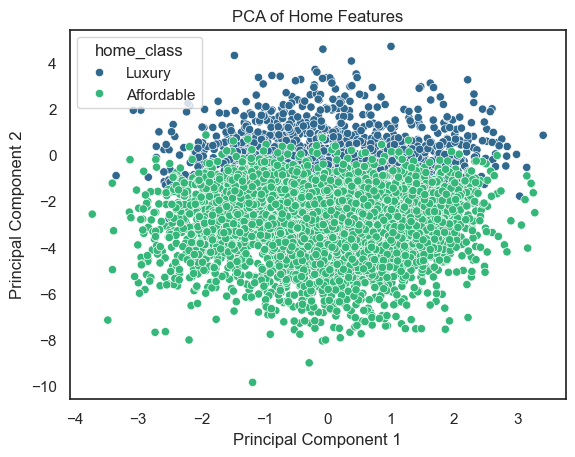

In [35]:
# Plotar o resultado do PCA
sns.scatterplot(data=pca_combined, x='PC1', y='PC2', hue='home_class', palette='viridis')
plt.title('PCA of Home Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Variáveis originais que contribuíram mais para cada componente principal 
- Analisando os "loadings" ou "pesos" de cada variável nos componentes principais é possível entender a importância relativa de cada variável na formação dos componentes principais.

In [36]:
# Ajuste do PCA
pca.fit(luxury_scaled)

# Obtenção dos loadings
loadings_df = pd.DataFrame(data=pca.components_,
                           columns=df.select_dtypes(include=['float64', 'int64']).columns)
display(loadings_df)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.362738,-0.011538,-0.686950,-0.619429,0.109428,0.026860
1,0.693186,-0.187388,0.180676,0.216978,-0.108954,0.626726


## <u>Conclusões:</u> Principal Component Analysis (PCA) - Casas de Luxo

No DataFrame loadings_df, temos duas linhas correspondentes aos dois componentes principais (PC1 e PC2). Cada coluna representa uma variável original do seu conjunto de dados.

Para interpretar os loadings é necessário entender:

- Magnitude do Loading: O valor absoluto de cada loading indica a importância relativa da variável na formação do componente principal. Quanto maior o valor absoluto, maior é a contribuição da variável para aquele componente principal.
- Sinal do Loading: O sinal (positivo ou negativo) indica a direção da relação entre a variável original e o componente principal. Um loading positivo indica que a variável está positivamente associada ao componente principal, enquanto um loading negativo indica uma associação negativa.

### Primeiro Componente Principal (PC1):

- Avg. Area Income: Loading positivo de 0.3627.
- Avg. Area House Age: Loading negativo de -0.0115.
- Avg. Area Number of Rooms: Loading negativo de -0.6869.
- Avg. Area Number of Bedrooms: Loading negativo de -0.6194.
- Area Population: Loading positivo de 0.1094.
- Price: Loading positivo de 0.0269.

O Primeiro Componente Principal (PC1) é uma combinação linear das variáveis originais, onde a renda média da área (Avg. Area Income), a população da área (Area Population) e o preço (Price) têm contribuições positivas significativas para o PC1. Por outro lado, o número médio de quartos (Avg. Area Number of Rooms) e o número médio de quartos (Avg. Area Number of Bedrooms) têm contribuições negativas mais significativas, o que sugere uma relação negativa entre essas variáveis e o PC1.

### Segundo Componente Principal (PC2):

- Avg. Area Income: Loading positivo de 0.6932.
- Avg. Area House Age: Loading negativo de -0.1874.
- Avg. Area Number of Rooms: Loading positivo de 0.1807.
- Avg. Area Number of Bedrooms: Loading positivo de 0.2170.
- Area Population: Loading negativo de -0.1090.
- Price: Loading positivo de 0.6267.

Para o Segundo Componente Principal (PC2), observamos uma maior influência positiva da renda média da área (Avg. Area Income), do número médio de quartos (Avg. Area Number of Rooms) e do número médio de quartos (Avg. Area Number of Bedrooms). Por outro lado, a idade média das casas (Avg. Area House Age) e a população da área (Area Population) têm contribuições negativas mais significativas para o PC2.

In [37]:
# Ajuste do PCA
pca.fit(affordable_scaled)

# Obtenção dos loadings
loadings_df = pd.DataFrame(pca.components_, columns=df.select_dtypes(include=['float64', 'int64']).columns)
display(loadings_df)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,-0.357968,-0.221232,-0.157773,-0.107899,-0.155857,-0.872978
1,-0.361067,-0.084359,0.677954,0.633451,-0.031061,-0.025840


## <u>Conclusões:</u> Principal Component Analysis (PCA) - Casas Acessíveis

### Primeiro Componente Principal (PC1):

- Avg. Area Income: Loading negativo de -0.3579.
- Avg. Area House Age: Loading negativo de -0.2212.
- Avg. Area Number of Rooms: Loading negativo de -0.1578.
- Avg. Area Number of Bedrooms: Loading negativo de -0.1079.
- Area Population: Loading negativo de -0.1559.
- Price: Loading negativo de -0.8730.

Para o Primeiro Componente Principal das casas acessíveis, observamos que todas as variáveis têm loadings negativos. Isso sugere que, para as casas mais acessíveis, todas essas características (renda média da área, idade média das casas, número médio de quartos, número médio de quartos, população da área e preço) contribuem negativamente para o PC1. Isso indica uma relação negativa entre essas variáveis e o primeiro componente principal.

### Segundo Componente Principal (PC2):

- Avg. Area Income: Loading negativo de -0.3611.
- Avg. Area House Age: Loading negativo de -0.0844.
- Avg. Area Number of Rooms: Loading positivo de 0.6780.
- Avg. Area Number of Bedrooms: Loading positivo de 0.6335.
- Area Population: Loading negativo de -0.0311.
- Price: Loading negativo de -0.0258.

Para o Segundo Componente Principal das casas acessíveis, observamos que a renda média da área e a população da área têm loadings negativos, enquanto o número médio de quartos e o número médio de quartos têm loadings positivos. Isso sugere que, para o PC2 das casas acessíveis, as características relacionadas ao número de quartos e quartos têm uma influência positiva, enquanto a renda média da área e a população da área têm uma influência negativa, embora menos pronunciada.

Em resumo, os loadings dos componentes principais para as casas acessíveis indicam uma relação negativa mais forte com o primeiro componente principal, especialmente em relação ao preço, enquanto o segundo componente principal mostra uma relação mais equilibrada com características como o número de quartos e quartos.

# 4. Modelagem do Algorítmo de Regressão Linear
- Por fim neste projeto será modelado um algorítmo de Regressão Linear com a aplicação de técnicas para obtenção de um modelo de melhor performance preditiva e analisaremos seus resultados e métricas.
- Todas as etapas da construção do algorítmo serão explicadas passo a passo.

### Imports
- O serão importados do scikit-learn funções para dividirmos os dados em treino e teste, imputação e codificação dos dados.

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Pipeline para o tratamento de colunas categóricas e numéricas
Nestes dados não foram encontrados valores nulos porém demonstrarei uma das diversas maneiras possíveis de tratá-los ao invés de descartá-los e perder possíveis dados relevantes na instância.

Será feito um pipeline para o tratamento de colunas categóricas. Ele consiste em dois passos:

- imputer: Um SimpleImputer que substitui valores faltantes por uma constante (neste caso, a string 'missing'). Isso é útil para manter uma categoria consistente para dados faltantes nas variáveis categóricas.
- onehot: Um OneHotEncoder que converte variáveis categóricas em uma representação numérica usando o método de codificação one-hot. Isso é necessário porque a maioria dos algoritmos de machine learning só pode trabalhar com dados numéricos. A opção handle_unknown='ignore' é usada para lidar com qualquer categoria nova no conjunto de teste que não estava presente no conjunto de treino, ignorando-a.

In [39]:
## Selecionando features numéricas e categóricas
num_features = df.select_dtypes(include=['float64']).drop('Price', axis=1).columns
cat_features = df.select_dtypes(include=['object']).columns.drop(['Address'])  # Excluindo 'Address' se não for útil

# Criando os transformadores para as variaveis numéricas e categóricas
num_transformer = SimpleImputer(strategy='mean')

# Para as variáveis categóricas será criado uma pipeline que fará dois passos
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',
                                                            fill_value='missing')),
                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessor que aplicará transformações diferentes a colunas numéricas e categóricas
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])

# 5. Divisão dos dados em Treino e Teste 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Divisão em features (X) e target (y)
X = df.drop(['Price', 'Address'], axis=1)  # Removendo 'Address' se não for útil
y = df['Price']

# Aplicando o preprocessor as variáveis independentes
X_processed = preprocessor.fit_transform(X)

# Dividindo em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 6. Encontrando o melhor modelo com GridSearchCV
Serão testados os seguintes argumentos em busca do melhor modelo:

- 'fit_intercept': [True, False] - Indica se deve calcular a interceptação para o modelo linear. True significa calcular a interceptação.
- 'copy_X': [True, False], - Se deve ou não copiar os dados de entrada antes de ajustar o modelo. Geralmente, True é usado para evitar a modificação dos dados originais.
- 'n_jobs': [-1, None], - Número de trabalhos em paralelo para executar durante o ajuste. O valor -1 significa usar todos os processadores disponíveis, enquanto None significa usar apenas um trabalho.
- 'positive': [True, False] - Se deve restringir os coeficientes a serem positivos. Útil em situações onde espera-se que os coeficientes sejam estritamente positivos.



In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para o Grid Search
parametros = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [-1, None], 'positive': [True, False]}

# Criando o objeto Grid Search com Cross Validation
grid_search = GridSearchCV(LinearRegression(), parametros, cv=5, scoring='neg_mean_squared_error')

# Treinando o Grid Search com os dados de treino
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros encontrados
melhores_parametros = grid_search.best_params_
print("Melhores Parâmetros Encontrados:", melhores_parametros)

Melhores Parâmetros Encontrados: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [43]:
# Criando o modelo final com os melhores parâmetros
modelo_final = LinearRegression(**melhores_parametros)
modelo_final.fit(X_train, y_train)

# Fazendo predições com o modelo final
y_pred_final = modelo_final.predict(X_test)
y_pred_final[1:7]

array([1229512.55485642, 1156529.8462172 , 1203364.29930596,
       1075070.26160319, 1579146.02689521, 1022395.03225674])

# 7. Sumários, métricas e conclusões.

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Avaliando o modelo final
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)
print(f"Mean Squared Error do Modelo Final: {mse_final}")
print(f"R² Score do Modelo Final: {r2_final}")

Mean Squared Error do Modelo Final: 11434637208.290237
R² Score do Modelo Final: 0.9070599921832562


- <b>Mean Squared Error (MSE):</b> O MSE mede a dispersão dos erros quadráticos entre as previsões do modelo e os valores reais. Um MSE alto indica que, em média, as previsões estão distantes dos valores reais. No contexto dos preços de imóveis, um MSE alto na casa dos bilhões sugere que as previsões do modelo estão tendo dificuldades em se aproximar dos valores reais, considerando o que os preços das casas variam de 1.59 a 2.46 milhões de preços das casas resultando em uma precisão de previsão baixa.

- <b>R-squared (R²) de 0.90:</b> O R² é uma métrica que indica a proporção da variabilidade dos dados que é explicada pelo modelo. Um R² alto, como 0.90, indica que o modelo explica cerca de 90% da variabilidade dos dados, o que geralmente é considerado bom. Isso significa que o modelo tem uma capacidade considerável de explicar a variação nos preços dos imóveis com base nas características fornecidas.

- <b>Relação entre MSE Alto e R² Alto:</b> A relação entre um MSE alto e um R² alto sugere um paradoxo nos resultados do modelo. Enquanto o modelo é capaz de explicar uma grande parte da variabilidade dos dados (alta R²), ele ainda está tendo dificuldades em fazer previsões precisas em termos absolutos (alto MSE). Isso pode ocorrer em situações onde o modelo consegue capturar a tendência geral dos dados (alta R²), mas ainda erra bastante em prever os valores exatos (alto MSE). Pode indicar que o modelo é bom em fornecer uma visão geral, mas tem dificuldade em ajustar-se aos detalhes dos dados.

- <b>Interpretação Geral:</b> Um MSE alto e um R² alto juntos sugerem que o modelo tem boas capacidades de explicação dos padrões gerais nos dados, mas tem limitações na precisão das previsões em termos absolutos.

# Resíduos
- Os resíduos são a diferença entre os valores observados e os valores previstos pelo modelo. Em outras palavras, são os erros do modelo, representados como 
- A análise dos resíduos é importante para verificar se o modelo está capturando adequadamente a relação entre as variáveis independentes (features) e a variável dependente (target).

In [46]:
# Calculando os resíduos
residuos = y_test - y_pred_final

# Criando o DataFrame com os dados
residuos_df = pd.DataFrame({'Predições': y_pred_final, 'Resíduos': residuos})

## Gráfico de Dispersão dos Resíduos

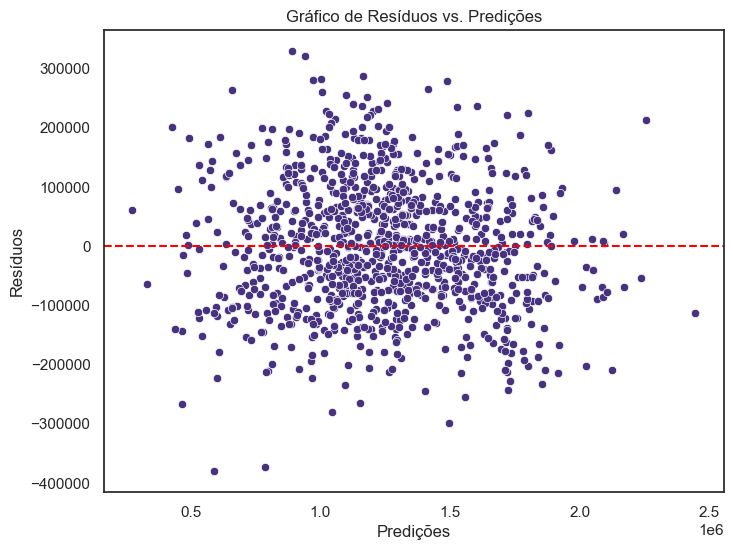

In [47]:
# Plotando o gráfico com Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=residuos_df, x='Predições', y='Resíduos')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos vs. Predições')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.show()

- No gráfico de dispersão dos resíduos x predições o eixo x do gráfico mostra as predições feitas pelo modelo e o eixo y mostra os resíduos, que são as diferenças entre os valores reais (y_test) e as predições (y_pred_final).
- A linha vermelha horizontal em y=0 é a linha de referência. Resíduos próximos a zero indicam que o modelo está acertando suas predições.
- Neste modelo é notória a alta dispersão dos dados em relação a linha de referência, houveram inúmeros casos em que previu preços muito acima e abaixo dos preços verdadeiros.
- Foi possível notar também uma alta concentração de dados em volta da linha de referência indicando um baixo erro nas previsões. Idealmente, gostaríamos de ver uma dispersão aleatória dos resíduos em torno de zero ao longo de todo o intervalo de predições. Isso sugere que o modelo está capturando adequadamente a relação entre as variáveis.

## Histograma dos Resíduos

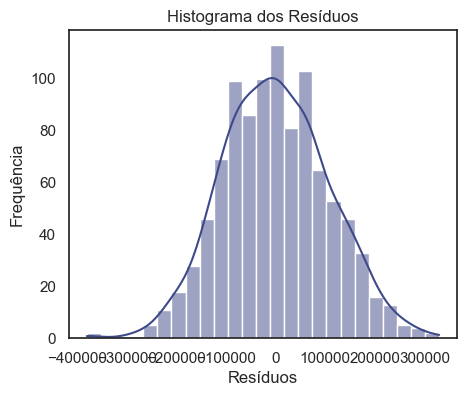

In [48]:
# Plotando o histograma dos resíduos
plt.figure(figsize=(5, 4))
sns.histplot(residuos_df['Resíduos'], kde=True, color='#3e4989')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

Interpretação:
- O histograma mostra a distribuição dos resíduos.
- A linha suave (KDE) representa a estimativa da densidade de probabilidade dos resíduos.
- Foi possível notar distribuição simétrica em torno de zero sugerindo que os resíduos seguem uma distribuição normal.
- Alguns outliers com valores em torno de -400k e 300k USD (valores de erro nas previsões) foram observados.

## Gráfico QQ (Quantile-Quantile) dos Resíduos

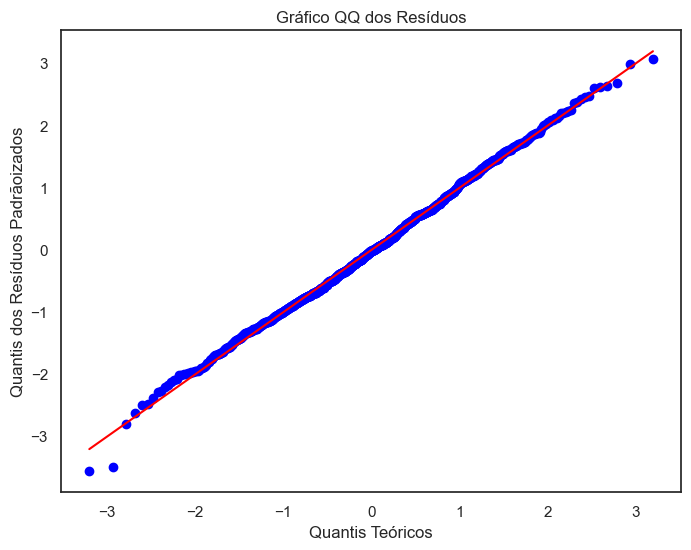

In [49]:
import scipy.stats as stats

# Calculando os resíduos padrãoizados
residuos_padrao = stats.zscore(residuos)

# Criando o gráfico QQ
plt.figure(figsize=(8, 6))
stats.probplot(residuos_padrao, dist="norm", plot=plt)
plt.title('Gráfico QQ dos Resíduos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Resíduos Padrãoizados')
plt.show()

Interpretação:

- O <i>stats.probplot</i> do SciPy foi utilizado para criar o Gráfico QQ dos Resíduos.
- Ele compara os quantis teóricos de uma distribuição normal com os quantis dos resíduos padrãoizados. Se os pontos caírem próximos à linha diagonal, indica que os resíduos seguem uma distribuição normal.
- Foi observado que poucos dados não estão próximos à linha diagonal, indicando que os resíduos seguem uma distribuição normal.

# Conclusões Finais
Primeiramente gostaria de agradecer por todo conhecimento adquirido.
Este foi mais um projeto end-to-end em data science em que pude aprender novas técnicas e diferentes análises na busca de trazer um modelo com melhores resultados. 

Todas as etapas seguindo um modelo com base no CRISP-DM foram concluídas, os dados foram tratados e modelados para a execução de todas as análises.

Busquei um entendimento aprofundado dos dados, e por fim foi executado um algorítmo de machine learning optimizado para obtenção dos melhores resultados possíveis e suas métricas de desempenho foram analisadas.

Me coloco a disposição para quaisquer dúvidas sobre o projeto.

Mais uma vez obrigado,

Gustavo.